In [1]:
import numpy as np
import scipy.ndimage
import scipy.signal
import matplotlib.pyplot as plt
from skimage import color, io
from skimage.morphology import disk

from echo_lv.data import LV_EKB_Dataset
from echo_lv.segmentation.level_set import Level_Set, GAC

ekb = LV_EKB_Dataset(img_size=(512, 512),)

Dataset is correct.


In [ ]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
# imgs, msks = ekb.get_sequence('05', 'DKMP')
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('12', 'Pathology_Old')

In [ ]:
ls = Level_Set(msks[0], C = 1)
gac = GAC(msks[0], C = 1, w = [0.7, 0.2, 0.1])

In [ ]:
plt.figure(figsize=(10, 5))
c = plt.contourf(ls.init_phi(msks[0]), 0);
plt.colorbar()
plt.gca().invert_yaxis()

## Level Set

In [ ]:
index=10
plt.figure(figsize=(8,8),frameon=False)
plt.imshow(imgs[0], cmap=plt.cm.gray)
plt.contour(ls.init_phi(msks[0]), 0, cmap=plt.cm.brg);
plt.axis('off')
# plt.title('Начальная инициализация контура на уровне $c=0$ функции $\phi$')
plt.savefig('level_set/init_surf.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


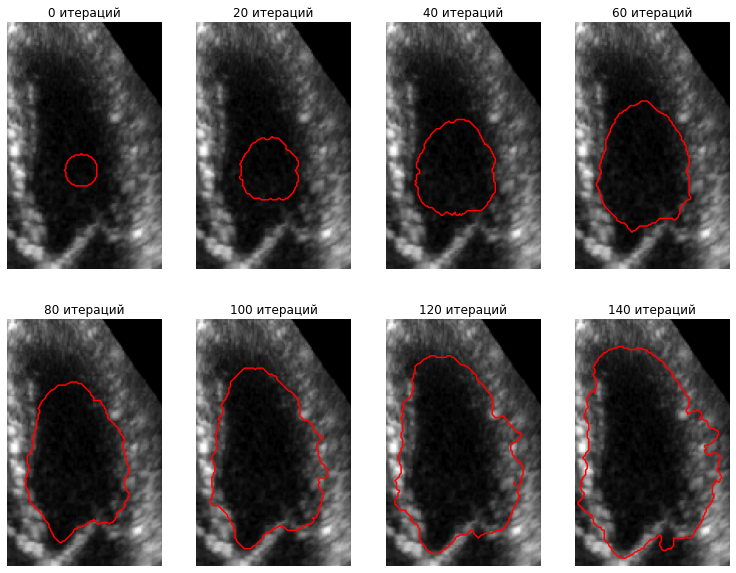

In [6]:
plt.figure(figsize=(13,10),frameon=False)
ls.predict(imgs[index], contin=False, it=0)
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[index], cmap=plt.cm.gray)
    plt.contour(ls.predict(imgs[index], contin=True, it=i * 20), 0, colors='r');
    plt.xlim(230,330)
    plt.ylim(60,220)
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title(str((i) * 20) + ' итераций')

plt.savefig('level_set/ls_result.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: No contour levels were found within the data range.
  after removing the cwd from sys.path.


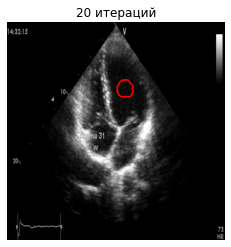

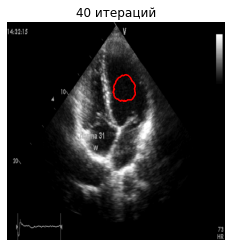

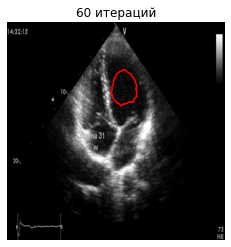

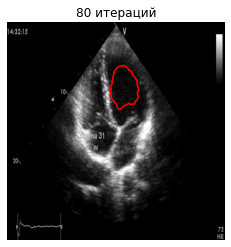

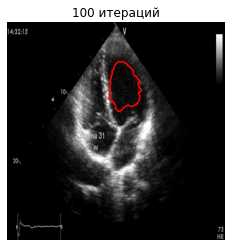

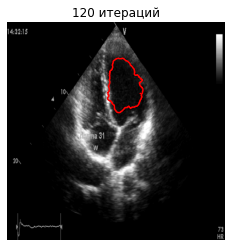

In [7]:
for i in range(1,7):
    plt.figure(figsize=(4,4),frameon=False)
    plt.imshow(imgs[0], cmap=plt.cm.gray)
    plt.contour(ls.predict(imgs[index], it=i * 20), 0, colors='r');
    plt.title(str((i) * 20) + ' итераций')
    plt.axis('off')
#     plt.savefig('level_set/ls_' + str((i) * 20) +'_iters.png', bbox_inches='tight', pad_inches=0)

## GAC

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  


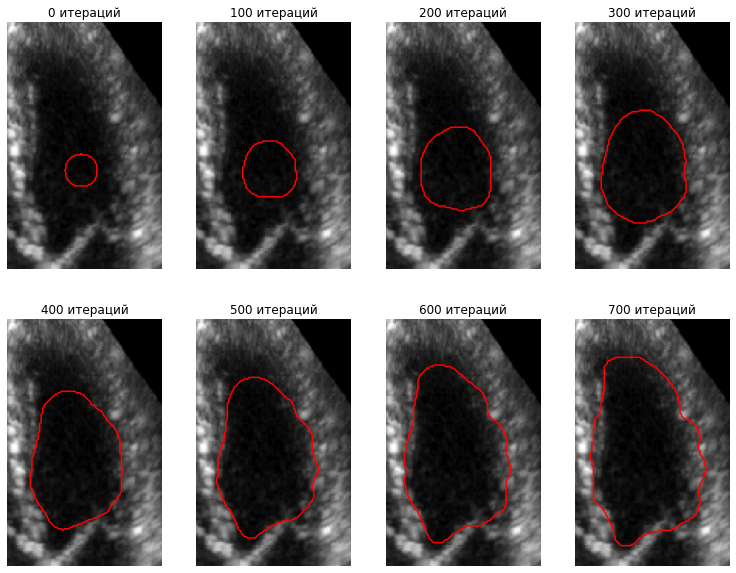

In [8]:
plt.figure(figsize=(13,10),frameon=False)
gac.cur_iter=0
for i in range(0,8):
    plt.subplot(2,4,i+1)
    plt.imshow(imgs[index], cmap=plt.cm.gray)
    plt.contour(gac.predict(imgs[index], contin=True, it= i * 100), 0, colors='r');
    plt.xlim(230,330)
    plt.ylim(60,220)
    plt.axis('off')
    plt.gca().invert_yaxis()
    plt.title(str((i) * 100) + ' итераций')

plt.savefig('level_set/gac_result.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


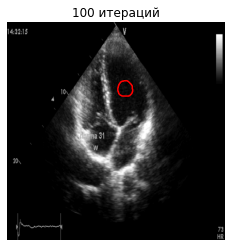

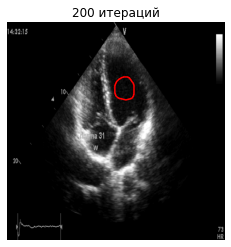

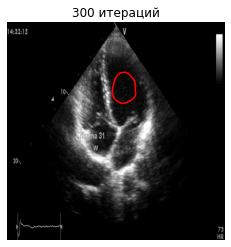

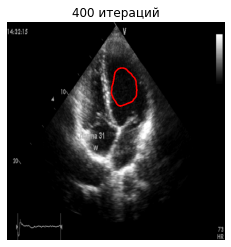

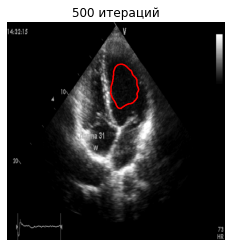

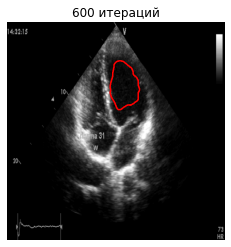

In [9]:
gac.cur_iter=0
for i in range(1,7):
    plt.figure(figsize=(4,4),frameon=False)
    plt.imshow(imgs[0], cmap=plt.cm.gray)
    plt.contour(gac.predict(imgs[index], contin=True, it=i * 100), 0, colors='r');
    plt.title(str((i) * 100) + ' итераций')
    plt.axis('off')
#     plt.savefig('level_set/gac_' + str((i) * 100) +'_iters.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: No contour levels were found within the data range.
  # Remove the CWD from sys.path while we load stuff.


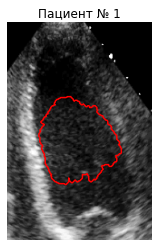

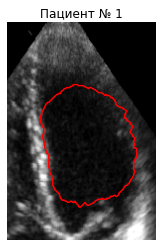

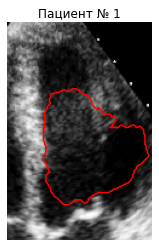

In [40]:
l = [{'patient' : '04', 'category' : 'Norma' },
     {'patient' : '21', 'category' : 'Norma_Old' },
     {'patient' : '05', 'category' : 'DKMP' },
    ]
for i, it in enumerate(l):
    imgs, msks = ekb.get_sequence(it['patient'], it['category'])
    ls = Level_Set(msks[0], C = 1)
    plt.figure(figsize=(4,4),frameon=False)
    plt.imshow(imgs[0], cmap=plt.cm.gray)
    plt.contour(ls.predict(imgs[0], it=100), 0, colors='r');
    plt.title('Пациент № 1')
    plt.axis('off')
    if i == 0:
        plt.xlim(210, 370)
        plt.ylim(120, 360)
    elif i == 1:
        plt.xlim(200, 350)
        plt.ylim(30, 250)
    elif i == 2:
        plt.xlim(240, 360)
        plt.ylim(130, 310)
    plt.gca().invert_yaxis()
    plt.savefig('level_set/ls_' + str(i+1) +'.png', bbox_inches='tight', pad_inches=0)

## Подбор порога

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from echo_lv.data import LV_EKB_Dataset
from echo_lv.metrics import dice
from echo_lv.segmentation.level_set import Level_Set, GAC

ekb = LV_EKB_Dataset(img_size=(512, 512),)


dice_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = Level_Set(msks[0], C = 1)
for i in range(300):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_1.append(dice(msks[0], msk_pred))
dice_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = Level_Set(msks[0], C = 1)
for i in range(300):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_2.append(dice(msks[0], msk_pred))
dice_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = Level_Set(msks[0], C = 1)
for i in range(300):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_3.append(dice(msks[0], msk_pred))

Dataset is correct.


In [11]:
iters_ls_1 = np.argmax(dice_1)
iters_ls_2 = np.argmax(dice_2)
iters_ls_3 = np.argmax(dice_3)

Text(0.5, 1.0, 'Метод уровневых множеств')

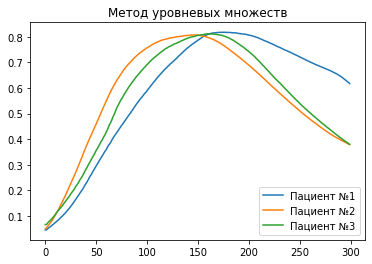

In [12]:
plt.plot(dice_1, label = 'Пациент №1')
plt.plot(dice_2, label = 'Пациент №2')
plt.plot(dice_3, label = 'Пациент №3')
plt.legend()
plt.title('Метод уровневых множеств')

In [24]:
print(iters_ls_1, iters_ls_2, iters_ls_3)

175 146 160


In [21]:
dice_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = GAC(msks[0], C = 1)
cur_dice = 0
for i in range(0, 2000, 10):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_1.append(dice(msks[0], msk_pred))
#     if cur_dice <= dice_1[-1]:
#         cur_dice = dice_1[-1]
#     else:
#         break
dice_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = GAC(msks[0], C = 1)
cur_dice = 0
for i in range(0, 2000, 10):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_2.append(dice(msks[0], msk_pred))
#     if cur_dice <= dice_2[-1]:
#         cur_dice = dice_2[-1]
#     else:
#         break
dice_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = GAC(msks[0], C = 1)
cur_dice = 0
for i in range(0, 2000, 10):
    msk_pred = segm.predict(imgs[0], contin=True, it=i)
    dice_3.append(dice(msks[0], msk_pred))
#     if cur_dice <= dice_3[-1]:
#         cur_dice = dice_3[-1]
#     else:
#         break

In [22]:
iters_gac_1 = 10*np.argmax(dice_1)
iters_gac_2 = 10*np.argmax(dice_2)
iters_gac_3 = 10*np.argmax(dice_3)
print(iters_gac_1, iters_gac_2, iters_gac_3)

1210 860 1210


Text(0.5, 1.0, 'Метод ГАК')

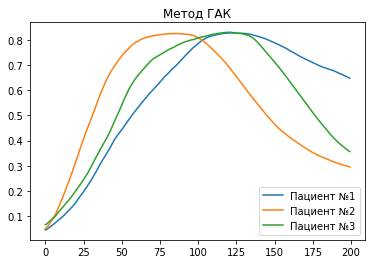

In [23]:
plt.plot(dice_1, label = 'Пациент №1')
plt.plot(dice_2, label = 'Пациент №2')
plt.plot(dice_3, label = 'Пациент №3')
plt.legend()
plt.title('Метод ГАК')

## Результаты сравнения

In [19]:
from echo_lv.segmentation.level_set import Level_Set, GAC
# imgs, msks = ekb.get_sequence('21', 'Norma_Old')
# imgs, msks = ekb.get_sequence('05', 'DKMP')
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('12', 'Pathology_Old')
index = 10
it = 120

In [20]:
# imgs, msks = ekb.get_sequence('21', 'Norma_Old')
imgs, msks = ekb.get_sequence('05', 'DKMP')
# imgs, msks = ekb.get_sequence('04', 'Norma')
# imgs, msks = ekb.get_sequence('12', 'Pathology_Old')
# ls = Level_Set(msks[0], C = 1)
# gac = GAC(msks[0], C = 1, w = [0.7, 0.2, 0.1])

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


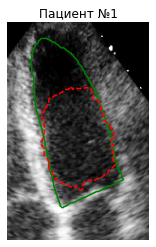

In [21]:
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = Level_Set(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №1')
plt.xlim(215, 365)
plt.ylim(130, 360)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_ls_1.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


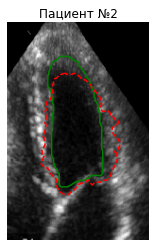

In [22]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = Level_Set(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №2')
plt.xlim(200, 350)
plt.ylim(30, 260)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_ls_2.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


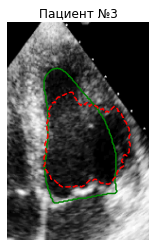

In [23]:
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = Level_Set(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №3')
plt.xlim(225, 375)
plt.ylim(105, 335)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_ls_3.png', bbox_inches='tight', pad_inches=0)

In [24]:
index = 10
it = 800

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


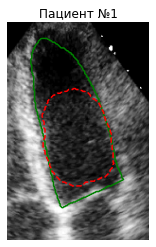

In [26]:
imgs, msks = ekb.get_sequence('04', 'Norma')
segm = GAC(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №1')
plt.xlim(215, 365)
plt.ylim(130, 360)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_gac_1.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


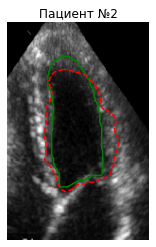

In [27]:
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
segm = GAC(msks[0], C = 1)
pred_msk = segm.predict(imgs[index], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №2')
plt.xlim(200, 350)
plt.ylim(30, 260)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_gac_2.png', bbox_inches='tight', pad_inches=0)

/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: No contour levels were found within the data range.
  
/home/vasily/.virtualenvs/cnn_course/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: No contour levels were found within the data range.
  import sys


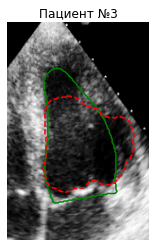

In [28]:
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = GAC(msks[0], C = 1)
pred_msk = segm.predict(imgs[3], it = it)
# pred_msk = segm.predict(imgs[index]. it = it)
plt.imshow(imgs[index], cmap=plt.cm.gray)
plt.contour(msks[index], 0, colors = 'g');
plt.contour(pred_msk, 0, colors = 'r', linestyles='dashed');
plt.axis('off')
plt.title('Пациент №3')
plt.xlim(225, 375)
plt.ylim(105, 335)
plt.gca().invert_yaxis()
plt.savefig('level_set/result_gac_3.png', bbox_inches='tight', pad_inches=0)

In [ ]:
from tqdm.notebook import tqdm
from echo_lv.metrics import dice, jaccard

In [60]:
list_dice_1 = []
# list_jaccard_1 = []
iters_dice_1 = []
# iters_jaccard_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
for img, msk in tqdm(zip(imgs, msks), total=len(imgs)):
    dice_temp = []
#     jaccard_temp = []
    segm = GAC(msks[0], C = 1)
    for i in range(0, 2000, 1):
        msk_pred = segm.predict(img, contin=True, it=i)
        dice_temp.append(dice(msk, msk_pred))
#         jaccard_temp.append(jaccard(msk, msk_pred))
    list_dice_1.append(np.max(dice_temp))
#     list_jaccard_1.append(np.max(jaccard_temp))
    iters_dice_1.append(np.argmax(dice_temp))
#     iters_jaccard_1.append(np.argmax(jaccard_temp))

In [68]:
list_dice_2 = []
# list_jaccard_2 = []
iters_dice_2 = []
# iters_jaccard_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
for img, msk in tqdm(zip(imgs, msks), total=len(imgs)):
    dice_temp = []
#     jaccard_temp = []
    segm = GAC(msks[0], C = 1)
    for i in range(0, 2000, 1):
        msk_pred = segm.predict(img, contin=True, it=i)
        dice_temp.append(dice(msk, msk_pred))
#         jaccard_temp.append(jaccard(msk, msk_pred))
    list_dice_2.append(np.max(dice_temp))
#     list_jaccard_2.append(np.max(jaccard_temp))
    iters_dice_2.append(np.argmax(dice_temp))
#     iters_jaccard_2.append(np.argmax(jaccard_temp))

In [ ]:
list_dice_3 = []
# list_jaccard_3 = []
iters_dice_3 = []
# iters_jaccard_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
segm = GAC(msks[0], C = 1)
for img, msk in tqdm(zip(imgs, msks), total=len(imgs)):
    dice_temp = []
#     jaccard_temp = []
    segm = GAC(msks[0], C = 1)
    for i in range(0, 2000, 1):
        msk_pred = segm.predict(img, contin=True, it=i)
        dice_temp.append(dice(msk, msk_pred))
#         jaccard_temp.append(jaccard(msk, msk_pred))
    list_dice_3.append(np.max(dice_temp))
#     list_jaccard_3.append(np.max(jaccard_temp))
    iters_dice_3.append(np.argmax(dice_temp))
#     iters_jaccard_3.append(np.argmax(jaccard_temp))

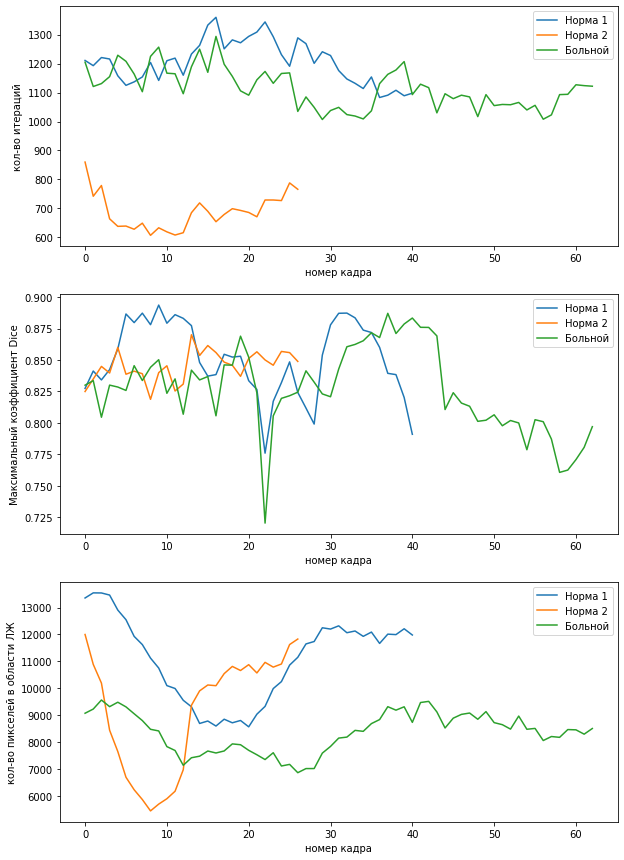

In [72]:
plt.figure(figsize=(10,15))
plt.subplot(311)
plt.plot(iters_dice_1, label='Норма 1')
plt.plot(iters_dice_2, label='Норма 2')
plt.plot(iters_dice_3, label='Больной')
plt.xlabel('номер кадра')
plt.ylabel('кол-во итераций')
plt.legend()
# plt.subplot(222)
# plt.plot(iters_jaccard_1, label='Норма 1')
# plt.plot(iters_jaccard_2, label='Норма 2')
# # plt.plot(iters_jaccard_3, label='Больной')
# plt.xlabel('номер кадра')
# plt.ylabel('количество итераций для масимального значения Jaccard')
# plt.legend()
plt.subplot(312)
plt.plot(list_dice_1, label='Норма 1')
plt.plot(list_dice_2, label='Норма 2')
plt.plot(list_dice_3, label='Больной')
plt.xlabel('номер кадра')
plt.ylabel('Максимальный коэффициент Dice')
plt.legend()
# plt.subplot(224)
# plt.plot(list_jaccard_1, label='Норма 1')
# # plt.plot(list_jaccard_2, label='Норма 2')
# # plt.plot(list_jaccard_3, label='Больной')
# plt.xlabel('номер кадра')
# plt.ylabel('Максимальный коэффициент Jaccard')
# plt.legend()
plt.subplot(313)
plt.plot(area_1, label='Норма 1')
plt.plot(area_2, label='Норма 2')
plt.plot(area_3, label='Больной')
plt.xlabel('номер кадра')
plt.ylabel('кол-во пикселей в области ЛЖ')
plt.legend()
plt.savefig('res.png', bbox_inches='tight', pad_inches=0)

In [54]:
area_1 = []
imgs, msks = ekb.get_sequence('04', 'Norma')
for msk in msks:
    area = len(np.where(msk != 0)[0])
    area_1.append(area)
area_2 = []
imgs, msks = ekb.get_sequence('21', 'Norma_Old')
for msk in msks:
    area = len(np.where(msk != 0)[0])
    area_2.append(area)
area_3 = []
imgs, msks = ekb.get_sequence('05', 'DKMP')
for msk in msks:
    area = len(np.where(msk != 0)[0])
    area_3.append(area)
    
    

In [57]:
df = ekb.df_images[(ekb.df_images['patient'] == '04') & (ekb.df_images['category'] == 'Norma')]

In [58]:
df.sort_values('obj_name')

,patient,category,img_shape,obj_name,bbox
328,04,Norma,"(600, 800)",01.bmp,None
329,04,Norma,"(600, 800)",02.bmp,None
330,04,Norma,"(600, 800)",03.bmp,None
331,04,Norma,"(600, 800)",04.bmp,None
332,04,Norma,"(600, 800)",05.bmp,None
333,04,Norma,"(600, 800)",06.bmp,None
334,04,Norma,"(600, 800)",07.bmp,None
335,04,Norma,"(600, 800)",08.bmp,None
336,04,Norma,"(600, 800)",09.bmp,None
337,04,Norma,"(600, 800)",10.bmp,None
